# CNN model for yeast cell cycle phase detection

Since my computer has AMD Radeon RX 5700 XT for GPU, I had to use tensorflow-directml: https://github.com/microsoft/DirectML

In [2]:
#import tensorflow for AMD GPU
import tensorflow.compat.v1 as tf 

tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

print(tf.add([1.0, 2.0], [3.0, 4.0])) 

Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
tf.Tensor([4. 6.], shape=(2,), dtype=float32)


# Data import

Data for training and testing loaded using convert_IDX: https://github.com/akcarsten/convert_IDX

In [47]:
from idx_tools import Idx

x_train=Idx.load_idx('./datasetTMP/train-images.idx3-ubyte')
y_train=Idx.load_labels('./datasetTMP/train-labels.idx3-ubyte')
x_test= Idx.load_idx('./datasetTMP/test-images.idx3-ubyte')
y_test=Idx.load_labels('./datasetTMP/test-labels.idx3-ubyte')

print(x_train.shape)
print(x_test.shape)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
(342, 80, 80)
(146, 80, 80)


Plot random image from the test set.

2


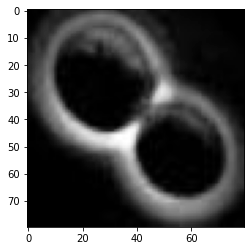

In [43]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 300 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 2, correspoding to M phase in cell cycle.
plt.imshow(x_train[image_index], cmap='Greys')

# Data prepocessing

In [48]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 80, 80, 1)
x_test = x_test.reshape(x_test.shape[0], 80, 80, 1)
input_shape = (80, 80, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (342, 80, 80, 1)
Number of images in x_train 342
Number of images in x_test 146


# CNN architecture and fitting to train data

In [8]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:DML:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=200)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/rep

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/rep

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op __inference_initialize_vari

342/342 [==============================] - 0s 442us/sample - loss: 0.0480 - acc: 0.9737
Epoch 71/200
342/342 [==============================] - 0s 447us/sample - loss: 0.0680 - acc: 0.9649
Epoch 72/200
342/342 [==============================] - 0s 444us/sample - loss: 0.0474 - acc: 0.9678
Epoch 73/200
342/342 [==============================] - 0s 441us/sample - loss: 0.0585 - acc: 0.9737
Epoch 74/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0543 - acc: 0.9708
Epoch 75/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0689 - acc: 0.9620
Epoch 76/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0483 - acc: 0.9766
Epoch 77/200
342/342 [==============================] - 0s 441us/sample - loss: 0.0667 - acc: 0.9737
Epoch 78/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0640 - acc: 0.9708
Epoch 79/200
342/342 [==============================] - 0s 449us/sample - loss: 0.0714 - acc: 0.9766
Epo

342/342 [==============================] - 0s 448us/sample - loss: 0.0384 - acc: 0.9678
Epoch 151/200
342/342 [==============================] - 0s 441us/sample - loss: 0.0398 - acc: 0.9678
Epoch 152/200
342/342 [==============================] - 0s 437us/sample - loss: 0.0341 - acc: 0.9766
Epoch 153/200
342/342 [==============================] - 0s 435us/sample - loss: 0.0413 - acc: 0.9649
Epoch 154/200
342/342 [==============================] - 0s 436us/sample - loss: 0.0455 - acc: 0.9708
Epoch 155/200
342/342 [==============================] - 0s 448us/sample - loss: 0.0392 - acc: 0.9737
Epoch 156/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0331 - acc: 0.9795
Epoch 157/200
342/342 [==============================] - 0s 431us/sample - loss: 0.0389 - acc: 0.9766
Epoch 158/200
342/342 [==============================] - 0s 438us/sample - loss: 0.0348 - acc: 0.9737
Epoch 159/200
342/342 [==============================] - 0s 443us/sample - loss: 0.0393 - acc: 0

In [24]:
model.evaluate(x_test, y_test)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_13479 in device /job:localhost/replica:0/task:0/device:DML:0
146/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8384386170400333, 0.8082192]

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 42588)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5451392   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 5,452,962
Trainable params: 5,452,962
Non-trainable params: 0
______________________________________________

In [55]:
#if needed to save the model and later reuse
#model.save('yeastCNN')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:DML:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:DML:0


# Prediction of cell cycle phase

Created model can be used to predict cell cycle phase from images.

Labels:\
'0'-'G1' \
'1 - G2M' \
'2' - 'M'\
'3' - 'S'\
\
Following part demonstrates how the generated CNN model can predict cell cycle phase from images. 

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Predicted label: 0


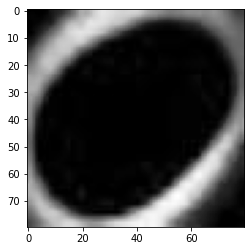

In [49]:
image_index = 1
plt.imshow(x_test[image_index].reshape(80, 80),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 80, 80, 1))
print('Predicted label: '+ str(pred.argmax()))

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Predicted label: 2


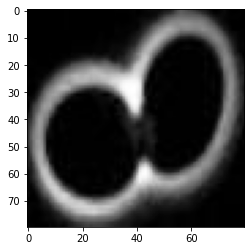

In [52]:
image_index = 100
plt.imshow(x_test[image_index].reshape(80, 80),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 80, 80, 1))
print('Predicted label: '+ str(pred.argmax()))